# Gaussian Smoothing Implementation

In [43]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

## Kernel Definition

In [80]:
def gaussian_kernel(size, sigma):
    # Create a coordinate grid centered at zero
    ax = np.linspace(-(size // 2), size // 2, size)
    xx, yy = np.meshgrid(ax, ax)
    
    # Calculate the Gaussian function
    kernel = np.exp(-(xx**2 + yy**2) / (2.0 * sigma**2))
    
    # Normalize the kernel so that the sum is 1
    kernel /= np.sum(kernel)
    
    return kernel

# Example usage
kernel_size = 3
sigma = 0.5
gaussian_k = gaussian_kernel(kernel_size, sigma)
print("gaussian after normalizaiton:", gaussian_k)


gaussian after normalizaiton: [[0.01134374 0.08381951 0.01134374]
 [0.08381951 0.61934703 0.08381951]
 [0.01134374 0.08381951 0.01134374]]


In [ ]:
def gaussian_filter_primitive(sigma, size):
    centre = size // 2
    kernel = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            x = i - centre
            y = j - centre
            kernel[i, j] = np.exp(-(x**2 +y**2) / (2.0 * sigma**2))
    kernel /= np.sum(kernel)
    return kernel

In [63]:
def convolution2d(image, kernel):
    kernel_height, kernel_width = kernel.shape
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    
    # Pad the image to handle borders
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')
    
    output = np.zeros_like(image)
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded_image[i:i + kernel_height, j:j + kernel_width]
            output[i, j] = np.sum(region * kernel)
    
    return output

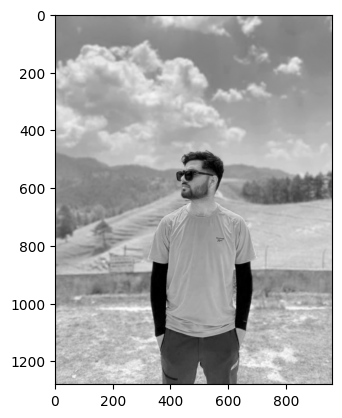

In [86]:
image = mpimg.imread('pabin.jpeg')
image_np = np.array(image)
image_gray = image_np[:,:,0]
plt.imshow(image_gray, cmap='gray')
plt.imshow(convolution2d(image_gray, gaussian_kernel(3, 0.5)), cmap='gray')

In [96]:
def conv3d(image, filter):

    return np.sum(np.array(convolution2d(img, fil) for img, fil in zip(image, filter)))

In [92]:
image_np.shape

(1280, 960, 3)

In [98]:
kernel = gaussian_kernel(3, 0.5)
filter = np.stack([kernel, kernel, kernel], axis=-1)
conv3d(image_np, filter).shape


AttributeError: 'generator' object has no attribute 'shape'

In [ ]:
kernel = gaussian_filter_primitive(2.0, 3)
filter = np.stack([kernel, kernel, kernel], axis=-1)
print("filter shape:", filter.shape)
image = mpimg.imread('pabin.jpeg')
image_np = np.array(image)

print(image_np.shape)
print(image_np)

filter shape: (3, 3, 3)
(1280, 960, 3)
(1280, 960, 3)
[[[144 181 225]
  [144 181 225]
  [144 181 225]
  ...
  [168 206 245]
  [172 207 245]
  [173 208 246]]

 [[144 181 225]
  [144 181 225]
  [144 181 225]
  ...
  [168 206 243]
  [173 208 246]
  [174 210 246]]

 [[144 181 225]
  [144 181 225]
  [144 181 225]
  ...
  [171 206 244]
  [173 209 245]
  [175 211 245]]

 ...

 [[152 148 123]
  [154 150 125]
  [156 152 127]
  ...
  [196 181 152]
  [198 181 153]
  [198 181 153]]

 [[159 155 130]
  [160 156 131]
  [161 157 132]
  ...
  [191 176 147]
  [192 175 147]
  [192 175 147]]

 [[169 165 140]
  [169 165 140]
  [168 164 139]
  ...
  [187 172 143]
  [188 171 143]
  [187 170 142]]]


In [73]:

filtered_image = conv3d(image_np, filter)
filtered_image_np = np.array(filtered_image, dtype=np.uint32)
print(filtered_image.shape)
print(filtered_image_np)


(960, 3)
[[220 117  19]
 [ 67  36 148]
 [ 67  36 148]
 ...
 [118 106 192]
 [122 110 195]
 [  3 169  52]]


/var/folders/7t/1srb5x6s5hdf7l0mmjrfjdk80000gn/T/ipykernel_15090/1242698667.py:3: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(convolution2d(img, fil) for img, fil in zip(image, filter))


In [74]:
plt.imshow(filtered_image_np, cmap='gray')
plt.axis('off')
plt.show()